In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data=pd.read_csv("hour.csv")
data.head()

,index,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
def data_cleaning(data):
    """
    Summarizes the dataset by providing descriptive statistics and checking for missing values.

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset to be summarized.
 """
    data_summary = data.describe()
    missing_values = data.isnull().sum()
    return data_summary, missing_values

In [37]:
data_summary,missing_values=data_cleaning(data)
print(data_summary)
print(missing_values)

            index     instant        season            yr          mnth  \
count  17379.0000  17379.0000  17379.000000  17379.000000  17379.000000   
mean    8689.0000   8690.0000      2.501640      0.502561      6.537775   
std     5017.0295   5017.0295      1.106918      0.500008      3.438776   
min        0.0000      1.0000      1.000000      0.000000      1.000000   
25%     4344.5000   4345.5000      2.000000      0.000000      4.000000   
50%     8689.0000   8690.0000      3.000000      1.000000      7.000000   
75%    13033.5000  13034.5000      3.000000      1.000000     10.000000   
max    17378.0000  17379.0000      4.000000      1.000000     12.000000   

                 hr       holiday       weekday    workingday    weathersit  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean      11.546752      0.028770      3.003683      0.682721      1.425283   
std        6.914405      0.167165      2.005771      0.465431      0.639357   
min     

In [38]:
import sklearn
from sklearn.cluster import KMeans

# Ensure the clustering step is performed
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['temp', 'hum']])  # Adjust features as needed

In [54]:
def Bar_chart_with_clustering(data):
    """
    Creates a bar chart showing the average value of a target column for each cluster.

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset containing the cluster and target columns.
    cluster_col : str
        The column name representing the cluster labels.
    target_col : str
        The column name representing the target variable (e.g., total user count).
  
        Displays the bar chart.
    """
    # Aggregate data by clusters to calculate the average value of the target column
    cluster_averages = data.groupby('cluster')['cnt'].mean().reset_index()

    # Bar chart for average values by cluster
    plt.figure(figsize=(8, 6))
    sns.barplot(x='cluster', y='cnt', data=cluster_averages,hue='cluster',legend='auto', palette='viridis')
    plt.title(f"Average {'cnt'.capitalize()} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(f"Average {'cnt'.capitalize()}")
    plt.xticks(ticks=cluster_averages['cluster'])
    plt.tight_layout()
    plt.show()

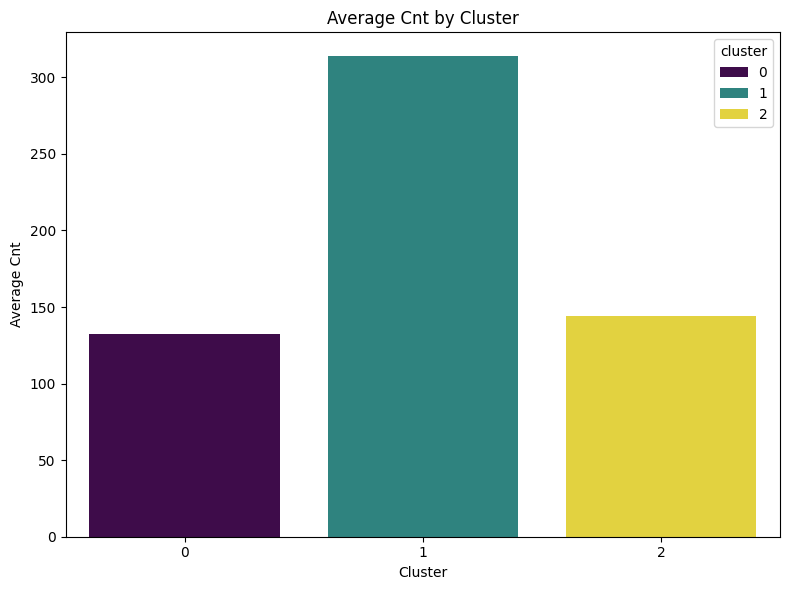

In [55]:
Bar_chart_with_clustering(data)

In [59]:
from sklearn.preprocessing import StandardScaler

def scatter_plot_with_clustering(data):
    """
    Creates a scatter plot showing the relationship between temperature and total user count,
    with data points grouped by clusters identified through k-means clustering.

    This function normalizes the selected features, performs k-means clustering, and
    visualizes the clustering result in a scatter plot. Cluster centers are also highlighted
    on the plot.

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset containing the features and target variable.

    Features Used for Clustering:
    -----------------------------
    - 'temp': Normalized temperature in Celsius.
    - 'atemp': Feels-like temperature in Celsius.
    - 'hum': Humidity level.
    - 'windspeed': Wind speed.

    Target Variable:
    ----------------
    - 'cnt': Total user count (used for y-axis in scatter plot).

    Clustering:
    -----------
    - Clustering is performed using k-means with 3 clusters.
    - Data is normalized before clustering using `StandardScaler`.
    """
    # Select features for clustering\
    features = ['temp', 'atemp', 'hum', 'windspeed']
    X = data[features]
    
    # Normalize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Apply k-means clustering with n_init explicitly set
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    data['cluster'] = kmeans.fit_predict(X_scaled)
    # Scatter plot with clustering
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='temp', y='cnt', hue='cluster', palette='viridis', data=data, alpha=0.8)
    plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    [data['cnt'].mean()] * len(kmeans.cluster_centers_),  # Center y-coordinate is average cnt
    s=200,
    c='red',
    label='Cluster Centers',
    edgecolor='black',
    marker='X'
    )
    plt.title("Temperature vs. Total User Count with Clusters")
    plt.xlabel("Normalized Temperature")
    plt.ylabel("Total User Count")
    plt.legend(title="Cluster", loc="upper left")
    plt.tight_layout()
    plt.show()

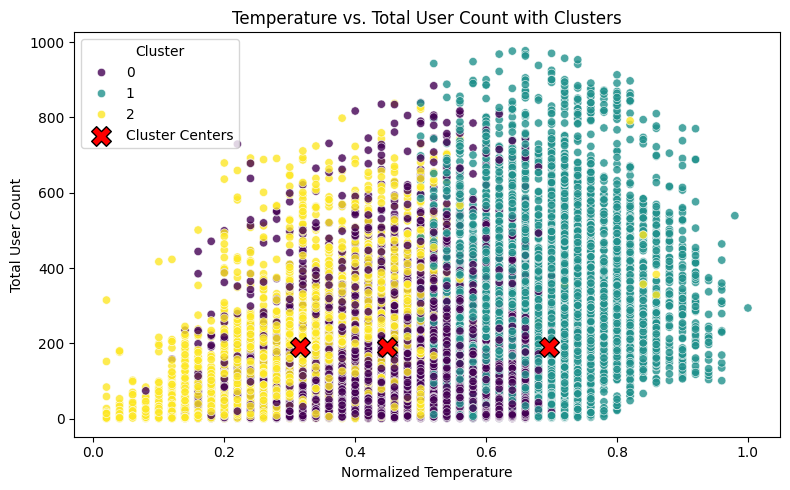

In [60]:
scatter_plot_with_clustering(data)

In [81]:
def corner_plot_with_fitting(data):
    """
    Creates a corner plot (pair plot) displaying pairwise relationships among selected features,
    with regression fits and kernel density estimates (KDE) on the diagonal.

    This function preprocesses the data by replacing infinite values with NaN and dropping 
    missing values, then generates a pair plot to visualize relationships among features.

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset containing the features and target variable.
    """
    # Replace inf/-inf with NaN and drop missing values
    features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(subset=features, inplace=True)
    
    # Create the corner plot with regression fits
    sns.pairplot(
    data[features],
    diag_kind='kde',        # Kernel Density Estimate on diagonals
    kind='reg',             # Add regression lines to scatter plots
    plot_kws={'scatter_kws': {'alpha': 0.6}, 'line_kws': {'color': 'red'}},
    corner=True
    )
    
    # Title for the overall plot
    plt.suptitle("Pairwise Relationships with Fitting", y=1.02)
    plt.show()

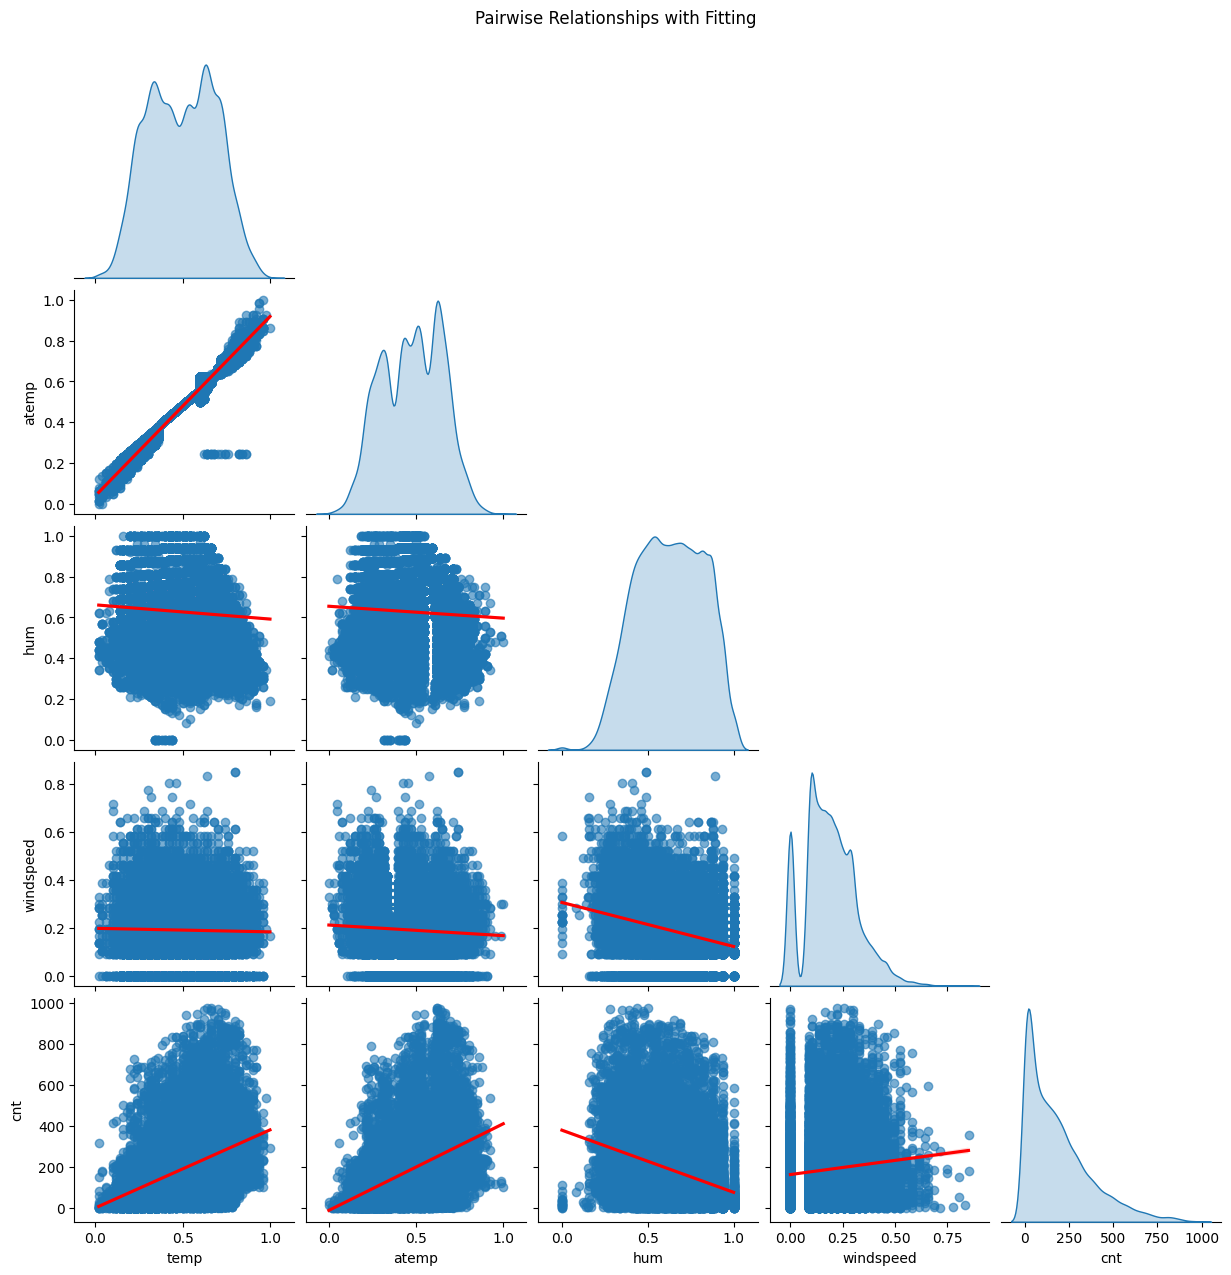

In [82]:
corner_plot_with_fitting(data)

In [92]:
def elbow_plot_with_clustering_and_visualization(data, features, optimal_k):
    """
    Generates an elbow plot for K-Means clustering and visualizes the clustering for the optimal number of clusters.

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset containing the features to be used for clustering.
    features : list
        List of column names to be used for clustering.
    optimal_k : int
        The number of clusters to use for the final clustering visualization.

    Returns:
    --------
    None
        Displays the elbow plot and the clustering visualization.
    """
    # Normalize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[features])
    
    # List to store inertia values and models
    inertia_values = []
    kmeans_models = []
    
    # Test KMeans for a range of clusters (1 to 10)
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        inertia_values.append(kmeans.inertia_)
        kmeans_models.append(kmeans)
    
    # Elbow plot to visualize the optimal number of clusters
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
    plt.title("Elbow Plot for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (WCSS)")
    plt.xticks(range(1, 11))
    plt.tight_layout()
    plt.show()
    
    # Fit KMeans with the chosen number of clusters
    final_kmeans = kmeans_models[optimal_k - 1]
    
    # Plot the data points and the cluster centers for the optimal k
    plt.figure(figsize=(8, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(
        final_kmeans.cluster_centers_[:, 0],
        final_kmeans.cluster_centers_[:, 1],
        marker='X',
        s=200,
        c='red',
        label="Cluster Centers"
    )
    plt.title(f"K-Means Clustering with {optimal_k} Clusters")
    plt.xlabel(features[0])  # First feature on x-axis
    plt.ylabel(features[1])  # Second feature on y-axis
    plt.legend()
    plt.tight_layout()
    plt.show()

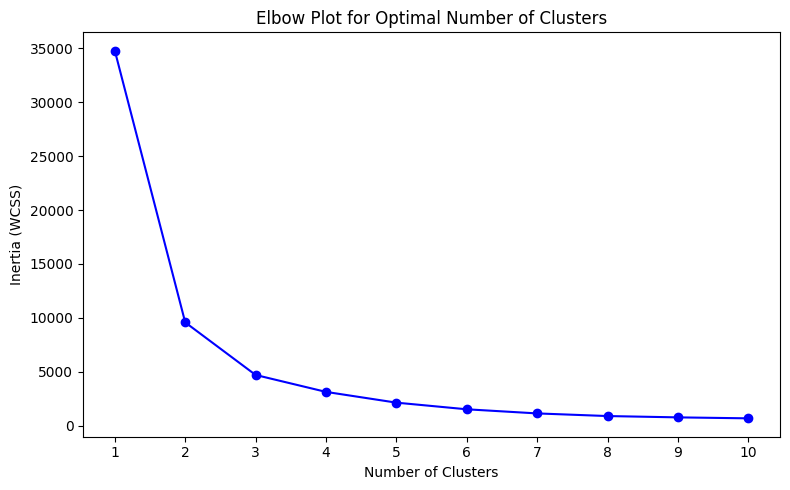

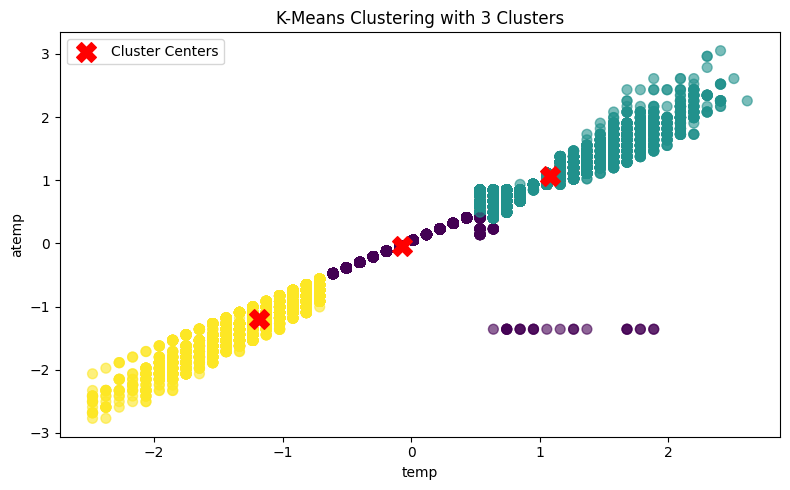

In [93]:
features = ['temp', 'atemp']  # Select two features for the scatter plot visualization
optimal_k = 3
elbow_plot_with_clustering_and_visualization(data, features, optimal_k)